In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import re

excel_file_path = '/content/drive/MyDrive/Colab Notebooks/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [4]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,  # Changed test size to 40% of the data
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (925,)
Shape of X_test: (617,)
Shape of y_train: (925,)
Shape of y_test: (617,)

Distribution of labels in y_train:


,count
label,
1,463
0,462



Distribution of labels in y_test:


,count
label,
0,309
1,308


In [6]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [7]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 1.504 seconds.
DEBUG:jieba:Loading model cost 1.504 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


Original X_train sample:


,content_cleaned
318,A日本代購。現貨。抗糖化口服液。抗老。口服的保養品具有獨特的配方能夠幫助促進皮膚新陳代謝維持...
396,梅中的檸檬酸能提高身體代謝率抑制血糖上升具有消除疲勞、維持體力與活力之效對預防心肌梗塞、腦梗...
1475,補充蔓越莓益生菌提升保護力。私密困擾比如說有異味啦或者是覺得私密處癢癢的甚至是分泌物變多的狀...
405,0%有感減肥瘦身產品夜燃產後恢復虛胖頑固體質停滯期必備飽腹感改善代謝窈窕身姿。
338,熱燃窈窕無副作用協助擺脫負擔防止油膩上身減輕嘴巴的慾望澱粉甜食控外食應酬族運動量不足鉀含量是...



Segmented X_train sample:


,content_cleaned
318,A 日本 代購 。 現貨 。 抗 糖化 口服液 。 抗老 。 口服 的 保養品 具有 獨特 ...
396,梅中 的 檸檬酸能 提高 身體代 謝率 抑制 血糖 上升 具有 消除 疲勞 、 維持 體力 ...
1475,補充 蔓 越莓 益生菌 提升 保護力 。 私密 困擾 比如 說 有 異味 啦 或者 是 覺得...
405,0% 有感 減 肥瘦 身產品 夜 燃產後恢 復 虛胖 頑固 體質 停滯期 必備 飽 腹感 改...
338,熱燃 窈窕 無 副作用 協助 擺脫 負擔 防止 油膩 上身 減輕 嘴巴 的 慾 望 澱 粉 ...



Original X_test sample:


,content_cleaned
1051,頑固脂肪終結組。依照不同的飲食習慣。調整吃法。讓清唯美的效益提升到最大。呈現出最AAA的你。...
548,想要醜小鴨變天鵝最後還被吃。呃不是擁有所有人都羨慕的健康人生其實不需要那麼麻煩。只要天天一粒...
700,順暢專科超有感複合000億益生菌搭配大研生醫000億益生菌三倍調整腸道保健益生菌讓您輕鬆調節...
530,怒鏟000AAA。糖尿病。嚴重便秘。排宿便。改變體態。體脂認真降很多。體態也開始在慢慢改變。...
29,小腹橡皮擦啤酒肚剋星、活化循環、煥白透亮、亮妍光感。動能超速纖‧小腹橡皮擦、重建循環、漢方、...



Segmented X_test sample:


,content_cleaned
1051,頑固 脂肪 終結組 。 依照 不同 的 飲食 習慣 。 調整 吃法 。 讓 清 唯美 的 效...
548,想要 醜小鴨 變天鵝 最後還 被 吃 。 呃 不是 擁有 所有人 都 羨慕 的 健康 人生 ...
700,順暢 專科超 有感 複 合 000 億 益生菌 搭配 大研 生醫 000 億 益生菌 三倍 ...
530,怒 鏟 000AAA 。 糖尿病 。 嚴重 便秘 。 排宿 便 。 改變 體態 。 體脂 認...
29,小腹 橡皮擦 啤酒肚 剋 星 、 活化 循環 、 煥白 透亮 、 亮妍 光感 。 動能 超速...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with min_df=2 to only include terms that appear at least twice
# and max_features to limit the number of features
vectorizer = TfidfVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (925, 3718)
Shape of X_test_bow: (617, 3718)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model with additional layers and dropout
model = Sequential([
    Dense(128, activation='relu'), # First hidden layer with ReLU activation
    Dropout(0.5),                  # Dropout layer for regularization
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.5),                  # Another Dropout layer
    Dense(32, activation='relu'),  # Third hidden layer (newly added)
    Dropout(0.5),                  # Third Dropout layer (newly added)
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), # Reduced learning rate
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=20, # Number of training epochs increased
                    shuffle=False,
                    batch_size=128, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 295ms/step - accuracy: 0.5076 - loss: 0.6935 - val_accuracy: 0.7230 - val_loss: 0.6904
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.6095 - loss: 0.6882 - val_accuracy: 0.7014 - val_loss: 0.6849
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6615 - loss: 0.6816 - val_accuracy: 0.7014 - val_loss: 0.6736
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.6770 - loss: 0.6680 - val_accuracy: 0.7554 - val_loss: 0.6534
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7332 - loss: 0.6421 - val_accuracy: 0.8345 - val_loss: 0.6182
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.7964 - loss: 0.6061 - val_accuracy: 0.9101 - val_loss: 0.5655
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8595 - loss: 0.5535 - val_accuracy: 0.9460 - val_loss: 0.4941
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9094 - loss: 0.4811 - val_accuracy: 0.9640 - val_loss: 

In [11]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9684 - loss: 0.1181

Test Loss: 0.1463
Test Accuracy: 0.9579


In [12]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

[True Negative]
Text: 三倍感受金盞花葉黃素含豐富的抗氧化成分有助於維持眼睛健康和保護視力。搭配營養均衡飲食讓您每天都能享受清晰明亮的視野輕鬆應對忙碌生活。
True Label: 0
Pred Label: 0

[True Positive]
Text: 眼科000內讓您感受水潤市售最高助您水潤跟疲勞、乾澀說。守護您的靈魂之窗。0AAA族:電腦和手機族群重度使用者輕盈提升工作效率四週內體驗水潤。眼睛總是疲勞乾澀看東西會霧煞煞水潤雙眸水潤有感。
True Label: 1
Pred Label: 1

[False Negative]
Text: 鈣質。而且不只影響我們的行動力、小朋友的成長狀況甚至也跟睡眠、情緒有相關。海藻鈣結構為蜂窩多孔性結構提供更好的吸收率可以高達000%。添加日本專利AAA水解蛋黃粉可以協同鈣作用。紐西蘭酪蛋白水解產物可幫助鈣質在消化道形成可溶性狀態促進鈣吸收。市售最高海藻鈣。
True Label: 1
Pred Label: 0

[False Positive]
Text: 好睡優優格益生菌睡前一包幫助入睡。基於原物料供應與產品品質恕無法指定到貨日。好睡優益生菌AAA含量為約為。使用本產品應避免同時飲酒或服用血壓藥物、鎮靜及癲癇等藥物;孕婦、授乳者、嬰幼兒須諮詢醫師方可使用。
True Label: 0
Pred Label: 1

[Random]
Text: 美肌美胸一次滿足。停吃不回縮。調理女性婦科。改善下垂、大小奶、產後萎縮。解決平胸、缺乏彈性等問題。維持胸部最佳狀態。乳腺疏通。美胸保養。加強吃法一天000顆。想要長大者。嚴重下垂者。想改變胸型者。對胸部不夠滿意者。一般吃法一天000顆。大小已滿意者。想維持胸部狀態者。想保持胸部與肌膚彈性者。
True Label: 1
Pred Label: 1


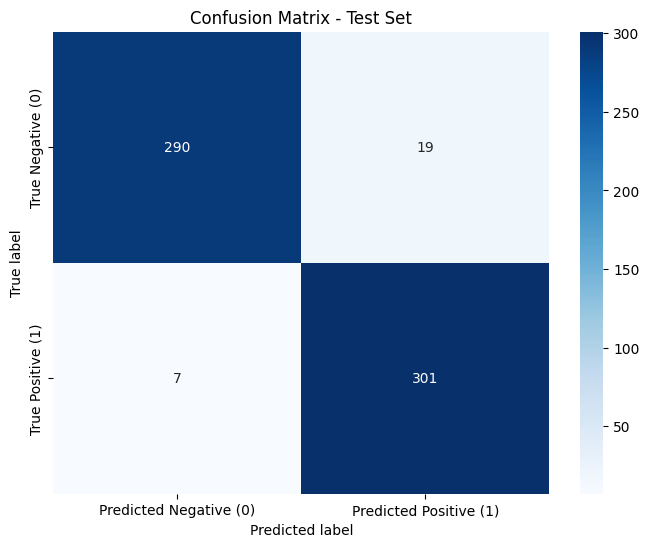

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [14]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       309
           1       0.94      0.98      0.96       308

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



In [15]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9684 - loss: 0.1181

Test Loss: 0.1463
Test Accuracy: 0.9579


In [16]:
# 新增
# Convert y_test to numerical dtype if it hasn't been already
y_true = y_test.values.astype('float32')
display("y_true =", y_true)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()

# Calculate predictions (y_pred) for the test set
y_pred_prob = model.predict(X_test_bow_dense).ravel().astype('float32')
display("y_pred_prob =", y_pred_prob)

'y_true ='

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


'y_pred_prob ='

array([9.96536314e-01, 4.35103721e-04, 1.23227632e-03, 9.99909580e-01,
       9.99994695e-01, 9.99701738e-01, 8.06878805e-01, 9.92314696e-01,
       2.76605308e-04, 4.88116842e-04, 3.51594281e-05, 1.36075839e-01,
       4.06949371e-02, 2.84092850e-03, 9.98043239e-01, 9.99949396e-01,
       9.99961972e-01, 9.96845901e-01, 9.99651909e-01, 9.99772251e-01,
       1.50832871e-03, 9.96617019e-01, 3.08936532e-03, 3.10882647e-03,
       9.91569579e-01, 9.94485676e-01, 1.95080953e-04, 8.14012383e-05,
       9.99683499e-01, 2.24681207e-04, 9.67517138e-01, 9.99331295e-01,
       3.36295518e-04, 9.97730255e-01, 9.99681950e-01, 1.77131806e-04,
       9.98716474e-01, 9.99726951e-01, 4.27925050e-01, 1.46641294e-04,
       9.99378383e-01, 9.45295036e-01, 9.97934639e-01, 6.83010949e-05,
       8.44851017e-01, 2.34387899e-05, 1.23639678e-04, 9.93099630e-01,
       1.18313706e-03, 9.99092698e-01, 1.38597528e-03, 9.99569416e-01,
       6.26941863e-03, 3.82279432e-05, 9.96937633e-01, 9.99828219e-01,
      

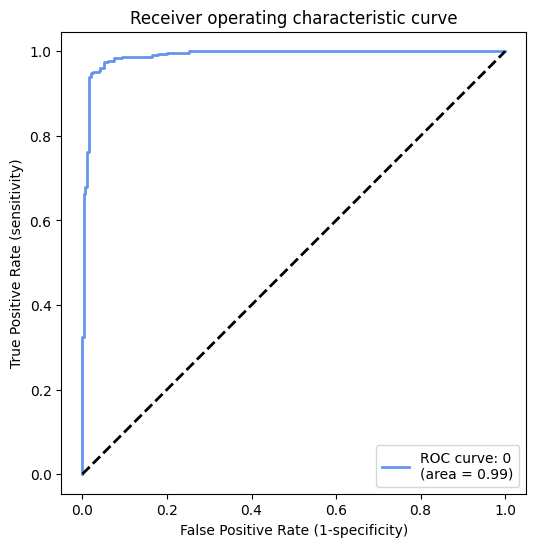

In [17]:
#@title 畫出 ROC曲線
#@markdown https://zh.wikipedia.org/zh-tw/ROC%E6%9B%B2%E7%BA%BF
from sklearn.metrics import roc_curve, auc

# 分別算出每一類別的 FPR(假陽率) TPR(真陽率) AUC(roc_curve底下的面積)
fpr, tpr, _ = roc_curve(y_true[:], y_pred_prob[:])
roc_auc = auc(fpr, tpr)

# plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(fpr, tpr, color='cornflowerblue', lw=2,
            label=f'ROC curve: {0}\n(area = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(xlim=(0.0, 1.0), ylim=(0.0, 1.0))
ax.axis('equal')
ax.set_xlabel('False Positive Rate (1-specificity)')
ax.set_ylabel('True Positive Rate (sensitivity)')
ax.set_title('Receiver operating characteristic curve')
ax.legend(loc="lower right")
plt.show()

In [18]:
# 信心值超過多少預測為陽性
threshold = 0.5
y_pred = y_pred_prob > threshold
display("y_true =", y_true.astype(int))
display("y_pred =", y_pred.astype(int))

'y_true ='

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,

'y_pred ='

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

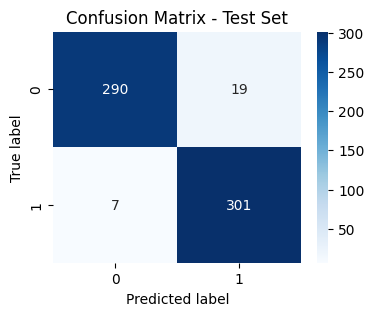

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the confusion matrix
[[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap([[tn, fp], [fn, tp]], annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [20]:
# 自訂意 cost function [TODO]
def cost_fn(y_true, y_pred_prob, threshold=0.5):
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred_prob > threshold)
    cost = -20*fn+20*tn-tp-fp

    return int(cost)

# function test:
cost_fn(y_true, y_pred_prob, threshold=0.5)

5340

In [21]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       309
         1.0       0.94      0.98      0.96       308

    accuracy                           0.96       617
   macro avg       0.96      0.96      0.96       617
weighted avg       0.96      0.96      0.96       617



In [22]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

[True Negative]
Text: 啟賦羊000打底體質。有感保護力。香純口感好。口感溫和順口適合挑嘴寶寶。0、羊乳蛋白。減少鈣質流失、助吸收營養、助調整體質。維生素AAA。能增進黏膜健康提升保護力。阿爾卑斯山純淨乳源帶。甘甜水源與新鮮嫩草孕育純淨羊乳源。0%珍稀乳源。嚴選歐洲貴族羊專業奶農悉心飼養。日均產量僅估全球乳量不到000%滴珍貴。
True Label: 0
Pred Label: 0

[True Positive]
Text: 來顆蛋吧抗癌健腦。吃蛋000好處000立即提升心情。0滋養肌肉系統。0抗癌。0滋養大腦。0保護視力。0瘦身。
True Label: 1
Pred Label: 1

[False Negative]
Text: 誘人AAA型、豐潤飽滿、啟動豐盈能量關鍵、A彈無限放大、自然波波實力、圓挺、勾勒魅力弧度、平易近人、被叫小兄弟、性感絕緣體、一馬平川、再一次成長蛻變、豐挺撩人、懸吊支撐、A彈圓潤、完美AAA型弧度、彈、滿、圓。
True Label: 1
Pred Label: 0

[False Positive]
Text: 年過節面對長輩的關心問候。總是讓你血壓飆升。️。真的好想閃退登出。趕緊讓。娘家大紅麴。幫你化解。長輩問:年終有多少。多少不是重點重點是有沒有用。大紅麴。有效調節血脂讓你用餐多吃點好料。長輩問:今年會加薪嗎。不管薪水加幾%都換不回逝去的健康。有效調節血糖保你身體穩妥當。長輩問:還記得"我"是誰嗎。您忘記自己是誰了嗎沒關係。有效延緩衰老讓你思緒條理更清晰。而且還有。唯一國家。0。健字號000。重功效認證。擁有全球唯一。獨家專利AAA。安可信心。
True Label: 0
Pred Label: 1

[Random]
Text: 德國原裝進口獨家高劑量AAA。0AAA鎂鋅一錠000顆檸檬的維生素AAA喝護自己不用酸溜溜減鈉配方健康少負擔。
True Label: 0
Pred Label: 0


In [23]:
import pandas as pd

# === 載入測試資料 ===
# 假設檔案放在同一個資料夾底下
predict_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/predict_sample.csv")
predict_df

,ID,content_cleaned
0,1,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...
...,...,...
95,96,\。A鱸魚精讓你輕鬆補充營養活力滿滿。術後補養首選。每天來一包。金目鱸魚精華。國家健康食品。...
96,97,學習領先關鍵。專為兒童設計。迷你可咀嚼軟膠囊好吞又好咬。無色素無人工香料寶貝補充好安心。
97,98,想豐胸促進胸部成長刺激女性荷爾蒙幫助發育促進乳腺管增長住膠原蛋白增生調理內分泌平衡荷爾蒙美肌...
98,99,買000送000拉蓓燉雞精精煉純雞搭配獨特配方簡單烹煮優雅濃郁的湯頭讓您享受美味的雞肉風味。...


In [24]:
# ====== 1. 對預測資料進行斷詞(如同3A) ======
predict_df["content_segmented"] = predict_df["content_cleaned"].apply(segment_text)

# ====== 2. 使用訓練過的 vectorizer 進行特徵轉換(如同3B) ======
# 只能用 transform，不能用 fit 或 fit_transform
# 因為 vectorizer 的詞彙表已經在訓練階段確定，不能改變
X_predict_bow = vectorizer.transform(predict_df["content_segmented"])

# ====== 3. 轉換成 Dense Tensor (如果4有進行此步驟) ======
X_predict_dense = X_predict_bow.todense()

# ====== 4. 使用訓練好的模型進行預(假設閾值為0.5) ======
y_proba = model.predict(X_predict_dense).ravel()   # 機率 0~1
y_pred = (y_proba >= 0.5).astype(int)              # 二元分類結果 0/1

# ====== 5. 輸出成 CSV 檔案 ======
output_df = pd.DataFrame({
    "ID": predict_df["ID"],
    "label": y_pred
})

output_file = "groupX_NAME_answer_v0.csv"
output_df.to_csv(output_file, index=False, encoding="utf-8-sig")
output_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


,ID,label
0,1,0
1,2,1
2,3,0
3,4,0
4,5,1
...,...,...
95,96,0
96,97,0
97,98,1
98,99,0


In [25]:
"""
shap_analysis.py
完整 SHAP 可解釋性分析範例腳本。
支援兩種模式：
  - demo: 用 sklearn 的 breast_cancer 資料做示範 (binary classification)
  - csv : 從 CSV 讀取資料 (需 user 指定 target 欄位名稱)

輸出：
  - shap_summary.png, shap_bar.png, shap_dependence_<feature>.png, shap_force_<i>.html
  - feature_importance.csv
"""

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap

# ----------------------------
# User settings
# ----------------------------
MODE = "demo"   # "demo" or "csv"
CSV_PATH = "your_data.csv"      # 若 MODE == "csv" 請修改
TARGET_COL = "target"           # 若 MODE == "csv" 請修改
RANDOM_STATE = 42
TEST_SIZE = 0.2
OUTPUT_DIR = "shap_outputs"
MODEL_TYPE = "xgboost"  # 選擇 "xgboost", "lightgbm", 或 "random_forest"

# ----------------------------
# Utilities
# ----------------------------
os.makedirs(OUTPUT_DIR, exist_ok=True)

def save_fig(fig, name, dpi=150):
    path = os.path.join(OUTPUT_DIR, name)
    fig.savefig(path, bbox_inches="tight", dpi=dpi)
    print(f"[saved] {path}")

# ----------------------------
# Load data
# ----------------------------
if MODE == "demo":
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer(as_frame=True)
    X = data.frame.drop(columns=[data.target_names[0]] , errors="ignore") if False else data.frame.drop(columns=[data.target_names[0]]) if False else data.data
    X = data.data
    y = data.target
    feature_names = list(X.columns)
    print("Demo dataset loaded: breast_cancer")
else:
    if not os.path.exists(CSV_PATH):
        raise FileNotFoundError(f"CSV file not found: {CSV_PATH}")
    df = pd.read_csv(CSV_PATH)
    if TARGET_COL not in df.columns:
        raise ValueError(f"TARGET_COL '{TARGET_COL}' not found in CSV columns: {df.columns.tolist()}")
    # Basic preprocessing: drop rows with NA in target, fill/ drop NA in features as needed
    df = df.copy()
    df = df.dropna(subset=[TARGET_COL])
    y = df[TARGET_COL]
    X = df.drop(columns=[TARGET_COL])
    # Attempt simple numeric conversion for non-numeric columns (one-hot for small cardinality)
    non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric:
        print("Non-numeric columns detected:", non_numeric)
        # If many categories, user should preprocess separately; here we one-hot for simplicity
        X = pd.get_dummies(X, drop_first=True)
    feature_names = list(X.columns)

# ----------------------------
# Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y if len(np.unique(y))>1 else None
)
print(f"Train/test split: {X_train.shape} / {X_test.shape}")

# ----------------------------
# Optional scaling (for non-tree methods)
# ----------------------------
# For tree-based models scaling not required. If you switch to e.g. LogisticRegression, uncomment:
# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
# X_test  = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

# ----------------------------
# Train model
# ----------------------------
if MODEL_TYPE == "xgboost":
    model = xgb.XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=RANDOM_STATE,
    )
    model.fit(X_train, y_train)
elif MODEL_TYPE == "lightgbm":
    import lightgbm as lgb
    model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
elif MODEL_TYPE == "random_forest":
    model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
else:
    raise ValueError("Unsupported MODEL_TYPE. Choose 'xgboost', 'lightgbm', or 'random_forest'.")

# ----------------------------
# Evaluate simple metrics
# ----------------------------
y_pred = model.predict(X_test)
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
}
print("Evaluation:", metrics)
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
    try:
        auc = roc_auc_score(y_test, y_proba)
        print("ROC AUC:", auc)
    except Exception:
        pass

# Save feature importance (if available)
fi = None
if MODEL_TYPE in ("xgboost", "lightgbm"):
    try:
        if MODEL_TYPE == "xgboost":
            # XGBoost feature importance
            fmap = model.get_booster().get_score(importance_type='gain')
            fi = pd.DataFrame(list(fmap.items()), columns=["feature", "importance"]).sort_values("importance", ascending=False)
        else:
            fi = pd.DataFrame({"feature": feature_names, "importance": model.feature_importances_}).sort_values("importance", ascending=False)
    except Exception:
        try:
            fi = pd.DataFrame({"feature": feature_names, "importance": model.feature_importances_}).sort_values("importance", ascending=False)
        except Exception:
            fi = None
elif MODEL_TYPE == "random_forest":
    fi = pd.DataFrame({"feature": feature_names, "importance": model.feature_importances_}).sort_values("importance", ascending=False)

if fi is not None:
    fi.to_csv(os.path.join(OUTPUT_DIR, "feature_importance.csv"), index=False)
    print("[saved] feature_importance.csv")

# ----------------------------
# SHAP Explainer
# ----------------------------
# Choose fastest explainer available:
explainer = None
shap_values = None
print("Building SHAP explainer...")

# For tree-based models use TreeExplainer (fast)
if MODEL_TYPE in ("xgboost", "lightgbm", "random_forest"):
    # Newer SHAP returns an Explanation object from explainer(X)
    explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
    # Use a subset for speed if dataset large
    X_background = shap.sample(pd.DataFrame(X_train).reset_index(drop=True), 200, random_state=RANDOM_STATE) if len(X_train)>200 else pd.DataFrame(X_train)
    shap_values = explainer.shap_values(X_test)  # could be list for multiclass
else:
    # Generic: KernelExplainer (slower) - we use a small background sample
    X_background = shap.sample(pd.DataFrame(X_train).reset_index(drop=True), 100, random_state=RANDOM_STATE)
    model_predict = lambda x: model.predict_proba(x)[:, 1]
    explainer = shap.KernelExplainer(model_predict, X_background)
    shap_values = explainer.shap_values(pd.DataFrame(X_test))

print("SHAP explainer built.")

# ----------------------------
# Handling shap_values object shape
# ----------------------------
# shap_values may be:
# - Explanation object (new API) with .values and .base_values, .data
# - numpy array for binary/regression: shape (n_samples, n_features)
# - list (for multiclass): list of arrays per class
#
# Make a consistent set of variables to pass into plotting functions.
if hasattr(shap_values, "values"):
    # Explanation object
    expl_values = shap_values.values
    base_values = shap_values.base_values
    # If multiclass, expl_values shape: (n_classes, n_samples, n_features) or (n_samples, n_features)
    # For many plotting functions shap.summary_plot expects matrix (n_samples, n_features) for the output of interest.
    if isinstance(expl_values, list):
        # sometimes shap returns list per class
        expl_values = np.array(expl_values)
else:
    expl_values = shap_values
    base_values = None

# If multiclass returned as list (one array per class), pick class 1 (or first) for explanation in many plots
if isinstance(expl_values, list) or (isinstance(expl_values, np.ndarray) and expl_values.ndim == 3):
    # try to select the "positive" class index = 1 if binary class with 2 outputs
    print("Multiclass/3D SHAP values detected. Selecting index 1 (if available) for plotting.")
    if isinstance(expl_values, list):
        if len(expl_values) >= 2:
            sv = expl_values[1]
        else:
            sv = expl_values[0]
    else:
        # shape (n_classes, n_samples, n_features)
        idx = 1 if expl_values.shape[0] > 1 else 0
        sv = expl_values[idx]
else:
    sv = expl_values  # shape (n_samples, n_features)

# Ensure sv is numpy array
sv = np.array(sv)

# ----------------------------
# Summary plot (dot)
# ----------------------------
print("Plotting SHAP summary plot (dot)...")
plt.figure(figsize=(8,6))
try:
    shap.summary_plot(sv, X_test, show=False)
    fig = plt.gcf()
    save_fig(fig, "shap_summary.png")
    plt.close()
except Exception as e:
    print("Error plotting summary plot:", e)

# ----------------------------
# Summary bar plot (importance ranking)
# ----------------------------
print("Plotting SHAP bar plot...")
plt.figure(figsize=(8,6))
try:
    shap.summary_plot(sv, X_test, plot_type="bar", show=False)
    fig = plt.gcf()
    save_fig(fig, "shap_bar.png")
    plt.close()
except Exception as e:
    print("Error plotting bar plot:", e)

# ----------------------------
# Dependence plot for top features
# ----------------------------
top_k = 3
top_features = None
if fi is not None:
    top_features = fi['feature'].iloc[:top_k].tolist()
else:
    # fall back to shap mean(|value|)
    mean_abs = np.mean(np.abs(sv), axis=0)
    feat_idx = np.argsort(mean_abs)[::-1][:top_k]
    top_features = [feature_names[i] for i in feat_idx]

print("Top features for dependence plots:", top_features)
for feat in top_features:
    try:
        plt.figure(figsize=(6,4))
        shap.dependence_plot(feat, sv, X_test, show=False)
        fig = plt.gcf()
        save_fig(fig, f"shap_dependence_{feat}.png")
        plt.close()
    except Exception as e:
        print(f"Error plotting dependence for {feat}:", e)

# ----------------------------
# Force plot (single samples) - HTML export for interactive view
# ----------------------------
# For interactive force plots it's best to save as HTML
print("Generating force plots for first 3 test samples (saved as HTML)...")
n_force = min(3, X_test.shape[0])
for i in range(n_force):
    try:
        # For newer SHAP, use shap.plots.force(explainer.expected_value, shap_values[i], X_test.iloc[i])
        # But saving interactive force requires JavaScript; easiest: use force_plot and save HTML
        if hasattr(shap, "force_plot"):
            # prepare values: if Explanation object, base_values may be array
            expected_value = None
            if base_values is not None:
                # base_values shape may be (n_samples,) or scalar
                if np.ndim(base_values) == 0:
                    expected_value = float(base_values)
                elif np.ndim(base_values) == 1:
                    expected_value = float(base_values[i]) if len(base_values)>i else float(base_values[0])
                else:
                    expected_value = float(base_values[0])
            else:
                expected_value = None
            # try shap.force_plot with either explainer.expected_value or computed base
            try:
                f = shap.force_plot(
                    explainer.expected_value if hasattr(explainer, "expected_value") else expected_value,
                    sv[i],
                    X_test.iloc[i],
                    matplotlib=False,
                    show=False
                )
                html_path = os.path.join(OUTPUT_DIR, f"shap_force_{i}.html")
                shap.save_html(html_path, f)
                print(f"[saved] {html_path}")
            except Exception as e:
                print("force_plot error (fallback to matplotlib force_plot):", e)
                # fallback: create a bar of contributions (simple)
                contribs = pd.Series(sv[i], index=X_test.columns).sort_values(key=lambda x: np.abs(x), ascending=False)[:20]
                fig, ax = plt.subplots(figsize=(8,4))
                contribs.plot(kind="barh", ax=ax)
                ax.set_title(f"Top contributions for sample {i}")
                save_fig(fig, f"shap_force_{i}.png")
                plt.close()
    except Exception as e:
        print("Error generating force plot:", e)

print("All SHAP plots generated in folder:", OUTPUT_DIR)

# ----------------------------
# Save SHAP values to CSV (optionally heavy)
# ----------------------------
try:
    sv_df = pd.DataFrame(sv, columns=X_test.columns)
    sv_df.insert(0, "y_true", np.array(y_test).reshape(-1))
    sv_df.to_csv(os.path.join(OUTPUT_DIR, "shap_values_testset.csv"), index=False)
    print("[saved] shap_values_testset.csv")
except Exception as e:
    print("Could not save full SHAP values:", e)

# ----------------------------
# Short interpretive guidance (printed)
# ----------------------------
print("\nQuick guidance:")
print("- shap_summary.png: 每個點代表一個樣本，橫軸是 SHAP 值（對預測的貢獻）。顏色代表原始特徵值高低。")
print("- shap_bar.png: 特徵平均重要性排名（mean absolute SHAP value）。")
print(f"- shap_dependence_<feature>.png: 顯示 {top_k} 個 top feature 的非線性效果與交互（若顏色為另一特徵則代表該交互特徵）。")
print("- shap_force_*.html: 互動式單一樣本貢獻視覺化（紅推高、藍推低）。")
print("\n如果你有自己的 DATAFRAME 或 CSV，我可以幫你把這個程式客製化成你的 pipeline（例如：處理類別變數、缺失值策略、或指定哪個 class 的 SHAP 解釋）。")


Demo dataset loaded: breast_cancer
Train/test split: (455, 30) / (114, 30)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:07:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluation: {'accuracy': 0.9473684210526315}
ROC AUC: 0.9917328042328042
[saved] feature_importance.csv
Building SHAP explainer...
SHAP explainer built.
Plotting SHAP summary plot (dot)...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:254: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


[saved] shap_outputs/shap_summary.png
Plotting SHAP bar plot...
[saved] shap_outputs/shap_bar.png
Top features for dependence plots: ['worst perimeter', 'worst radius', 'mean concave points']
[saved] shap_outputs/shap_dependence_worst perimeter.png
[saved] shap_outputs/shap_dependence_worst radius.png
[saved] shap_outputs/shap_dependence_mean concave points.png
Generating force plots for first 3 test samples (saved as HTML)...
[saved] shap_outputs/shap_force_0.html
[saved] shap_outputs/shap_force_1.html
[saved] shap_outputs/shap_force_2.html
All SHAP plots generated in folder: shap_outputs
[saved] shap_values_testset.csv

Quick guidance:
- shap_summary.png: 每個點代表一個樣本，橫軸是 SHAP 值（對預測的貢獻）。顏色代表原始特徵值高低。
- shap_bar.png: 特徵平均重要性排名（mean absolute SHAP value）。
- shap_dependence_<feature>.png: 顯示 3 個 top feature 的非線性效果與交互（若顏色為另一特徵則代表該交互特徵）。
- shap_force_*.html: 互動式單一樣本貢獻視覺化（紅推高、藍推低）。

如果你有自己的 DATAFRAME 或 CSV，我可以幫你把這個程式客製化成你的 pipeline（例如：處理類別變數、缺失值策略、或指定哪個 class 的 SHAP 解釋）。


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>